In [1]:
import pandas as pd
import json

## init data from parquet source

In [ ]:
source_data_path = 'data/summarization/cnn_dailymail/cnn_dailymail_test.parquet'

In [43]:
cnn_data = pd.read_parquet(source_data_path)
cnn_data['word_count'] = cnn_data['article'].str.split().apply(len).values
cnn_data = cnn_data.rename({'article': 'text', 'highlights': 'golden'}, axis=1)
cnn_data = cnn_data.drop('id', axis=1)
cnn_data = cnn_data[['text', 'word_count', 'golden']]
cnn_data.head(3)

,text,word_count,golden
0,(CNN)The Palestinian Authority officially beca...,567,Membership gives the ICC jurisdiction over all...
1,(CNN)Never mind cats having nine lives. A stra...,411,"Theia, a bully breed mix, was apparently hit b..."
2,"(CNN)If you've been following the news lately,...",704,Mohammad Javad Zarif has spent more time with ...


In [133]:
# cnn_data.word_count.hist()

In [45]:
cnn_data_sampled_short_input = cnn_data[cnn_data.word_count < 200].sample(3, random_state=42)
cnn_data_sampled_medium_input = cnn_data[(cnn_data.word_count > 200) &
                                         (cnn_data.word_count < 500)].sample(3, random_state=42)
cnn_data_sampled_long_input = cnn_data[(cnn_data.word_count > 750)].sample(3, random_state=42)

In [46]:
cnn_data_sampled = pd.concat([cnn_data_sampled_short_input,
                              cnn_data_sampled_medium_input,
                              cnn_data_sampled_long_input]).reset_index(drop=True)

In [47]:
cnn_data_sampled

,text,word_count,golden
0,(CNN)A mammoth fire broke out Friday morning i...,143,Fire breaks out at the General Electric Applia...
1,"Hull, Leicester and Swansea City are following...",147,Hull's chief scout Stan Ternent has watched M...
2,Sportsmail have teamed up with Golfbidder to o...,123,Sportsmail have teamed up with Golfbidder for ...
3,The time is right for Manchester United target...,260,Mats Hummels admits he is considering his Boru...
4,A road rage incident caught on camera shows a ...,422,A man was caught on video savagely beating an ...
5,Usually parents get to work teaching children ...,213,American YouTube user KentuckyFriedIdiot filme...
6,Jose Mourinho insists Manchester United's inju...,1093,"United are without Marcos Rojo, Phil Jones, Mi..."
7,Real Madrid closed the gap on Barcelona to jus...,1226,Sergio Ramos opened the scoring for Real Madri...
8,A new model for HIV progression shows that it ...,820,New model accurately predicted patients' progr...


In [48]:
# add reference columns
cols_to_add = ['notion', 'grammarly']
cnn_data_sampled[cols_to_add] = ""
# cnn_data_sampled = cnn_data_sampled.reindex(columns = cnn_data_sampled.columns.tolist() + cols_to_add)
cnn_data_sampled

,text,word_count,golden,notion,grammarly
0,(CNN)A mammoth fire broke out Friday morning i...,143,Fire breaks out at the General Electric Applia...,,
1,"Hull, Leicester and Swansea City are following...",147,Hull's chief scout Stan Ternent has watched M...,,
2,Sportsmail have teamed up with Golfbidder to o...,123,Sportsmail have teamed up with Golfbidder for ...,,
3,The time is right for Manchester United target...,260,Mats Hummels admits he is considering his Boru...,,
4,A road rage incident caught on camera shows a ...,422,A man was caught on video savagely beating an ...,,
5,Usually parents get to work teaching children ...,213,American YouTube user KentuckyFriedIdiot filme...,,
6,Jose Mourinho insists Manchester United's inju...,1093,"United are without Marcos Rojo, Phil Jones, Mi...",,
7,Real Madrid closed the gap on Barcelona to jus...,1226,Sergio Ramos opened the scoring for Real Madri...,,
8,A new model for HIV progression shows that it ...,820,New model accurately predicted patients' progr...,,


In [68]:
json_path = 'data/summarization/text_files'
data_file_name = 'txt_dataset_summarizer.json'
cnn_data_sampled.to_json(f'{json_path}/{data_file_name}', orient='index', indent=4, force_ascii=True)

## Generate config json

In [27]:
conf_file_name = 'txt_dataset_summarizer_config.json'

In [31]:
config_dict = {
    "current_doc_summarizer": {
        'model_name': 'text-davinci-003',
        'api_version': '2023-05-15',
        'temperature': 0.0,
        'max_tokens': 200,
        'prompt_template': 'summarize the following text: {input_text}'
    },
    "current_update_summarizer": {
        'model_name': 'text-davinci-003',
        'api_version': '2023-05-15',
        'temperature': 0.0,
        'max_tokens': 200,
        'prompt_template': 'summarize the following text: {input_text}'
    }
}

In [32]:
with open(f'{json_path}/{conf_file_name}', 'w', encoding='utf-8') as f:
    json.dump(config_dict, f, ensure_ascii=False, indent=4)

# Work with json files

In [2]:
import pandas as pd
import json

In [3]:
raw_json_file_path = '../data/automation_classifier/text_files'
raw_json_file_name = 'dataset_1.json'
with open(f'{raw_json_file_path}/{raw_json_file_name}') as f:
    raw_json_file = json.load(f)

In [4]:
for idx in range(0, len(raw_json_file)):
    print(raw_json_file[idx]['inp']['types_list'])
    print(len(raw_json_file[idx]['inp']['issues_list']))

['missing information', 'overdue task', 'stuck task', 'other']
5
['missing information', 'overdue task', 'stuck task', 'other']
5
['missing information', 'overdue task', 'stuck task', 'other']
5
['missing information', 'overdue task', 'stuck task', 'other']
5
['missing information', 'overdue task', 'stuck task', 'other']
5
['missing information', 'overdue task', 'stuck task', 'other']
5


```
{
"source_column_text" : "The homepage screen doesn't work on my mobile device.",
"target_column_name": "Request type",
"target_column_categories": ["feature request", "bug"],
"target_column_description": " feature request - refers to any request for non-existing capability. bug - refers to comments about stuff that doesn't work."
"actual_label": "bug",
}
```

In [5]:
raw_json_file[0]['expected_output'].keys()

dict_keys(['issues_type'])

In [6]:
categories = raw_json_file[0]['inp']['types_list']
categories

['missing information', 'overdue task', 'stuck task', 'other']

In [7]:
raw_json_file[2]

{'inp': {'issues_list': [{'item_id': '4870755910',
    'issue_description': "The task is overdue. It was supposed to be completed within 1 day after it started but it's now 14 days overdue."},
   {'item_id': '4804392862',
    'issue_description': "This task is behind schedule. It was supposed to be completed in the current sprint but has been moved to the next sprint and not started yet, which may affect the upcoming sprint's planned tasks and overall project timeline."},
   {'item_id': '4883806482',
    'issue_description': "The task has been moved to the next sprint when the current sprint isn't completed, indicating that the task is behind schedule."},
   {'item_id': '4883813317',
    'issue_description': 'The task has not yet started even though the deadline is approaching.'},
   {'item_id': '4835244929',
    'issue_description': 'the task has no priority and is not assigned to anyone.'}],
  'types_list': ['missing information',
   'overdue task',
   'stuck task',
   'other']},
 'e

In [15]:
final_testset = []

for inp in raw_json_file:
    for idx in range(len(inp['inp']['issues_list'])):
        text = inp['inp']['issues_list'][idx]['issue_description']
        expected_output = inp['expected_output']['issues_type'][idx]['issue_type']

        new_element = {"inp": {"categories_list": categories, "input_text": text},
                       "expected_output": {"possible_categories": expected_output}}
        final_testset.append(new_element)

final_testset

[{'inp': {'categories_list': ['missing information',
    'overdue task',
    'stuck task',
    'other'],
   'input_text': 'The actual SP value is not updated after the task is marked as done.'},
  'expected_output': {'possible_categories': 'missing information'}},
 {'inp': {'categories_list': ['missing information',
    'overdue task',
    'stuck task',
    'other'],
   'input_text': "The 'Estimated SP' for this task is missing, causing ambiguity in task completion assessment."},
  'expected_output': {'possible_categories': 'missing information'}},
 {'inp': {'categories_list': ['missing information',
    'overdue task',
    'stuck task',
    'other'],
   'input_text': 'The task was unplanned and completed without recording an estimated or actual Story Points value. This could make it more difficult to plan and manage future tasks.'},
  'expected_output': {'possible_categories': 'missing information'}},
 {'inp': {'categories_list': ['missing information',
    'overdue task',
    'stuck 

In [13]:
final_testset

[{'inp': {'input_text': 'The actual SP value is not updated after the task is marked as done.'},
  'expected_output': {'possible_categories': 'missing information'}},
 {'inp': {'input_text': "The 'Estimated SP' for this task is missing, causing ambiguity in task completion assessment."},
  'expected_output': {'possible_categories': 'missing information'}},
 {'inp': {'input_text': 'The task was unplanned and completed without recording an estimated or actual Story Points value. This could make it more difficult to plan and manage future tasks.'},
  'expected_output': {'possible_categories': 'missing information'}},
 {'inp': {'input_text': "The task 'CI Flaky Tests - always randomize account slug' is waiting for review but lacks an estimation. Plus, the task is 'Unplanned', which could imply it might not be completed within this sprint reaching 2023-08-12."},
  'expected_output': {'possible_categories': ['stuck task',
    'missing information']}},
 {'inp': {'input_text': "The task is in 

In [10]:
raw_json_file_path

'../data/automation_classifier/text_files'

In [16]:
with open(f'{raw_json_file_path}/issues_classification_1.json', 'w', encoding='utf-8') as f:
    json.dump(final_testset, f, ensure_ascii=False, indent=4)

# downloaded board + chatgpt output

In [25]:
import json

raw_json_file_path = '../data/automation_classifier/text_files/raw_files'
raw_json_file_name = 'feature_or_bug_gpt_examples.json'
with open(f'{raw_json_file_path}/{raw_json_file_name}') as f:
    raw_json_file = json.load(f)

In [26]:
len(raw_json_file)

100

In [27]:
raw_json_file

[{'input': "I'd love to have an option to save multiple drafts in the app!",
  'label': 'Feature request'},
 {'input': "Hey, there's this weird glitch where the colors of my tasks keep changing randomly.",
  'label': 'Bug'},
 {'input': "Can we please add a 'Mark as Unread' option for notifications?",
  'label': 'Feature request'},
 {'input': "The search function isn't working right, it keeps showing irrelevant results.",
  'label': 'Bug'},
 {'input': 'It would be awesome if we could have a dark mode for the mobile app!',
  'label': 'Feature request'},
 {'input': 'Urgent! The sidebar navigation disappeared after the last update.',
  'label': 'Bug'},
 {'input': 'I kindly request the addition of a feature that enables users to save multiple drafts within the application.',
  'label': 'Feature request'},
 {'input': "I'd like to report a technical issue where task colors seem to change randomly, without any user input.",
  'label': 'Bug'},
 {'input': 'We humbly suggest the implementation of

In [28]:
categories = ["Feature request", "Bug"]

final_testset = []

for element in raw_json_file:
    text = element['input']
    expected_output = element['label']

    new_element = {"inp": {"categories_list": categories, "input_text": text},
                   "expected_output": {"possible_categories": expected_output}}
    final_testset.append(new_element)

final_testset

[{'inp': {'categories_list': ['Feature request', 'Bug'],
   'input_text': "I'd love to have an option to save multiple drafts in the app!"},
  'expected_output': {'possible_categories': 'Feature request'}},
 {'inp': {'categories_list': ['Feature request', 'Bug'],
   'input_text': "Hey, there's this weird glitch where the colors of my tasks keep changing randomly."},
  'expected_output': {'possible_categories': 'Bug'}},
 {'inp': {'categories_list': ['Feature request', 'Bug'],
   'input_text': "Can we please add a 'Mark as Unread' option for notifications?"},
  'expected_output': {'possible_categories': 'Feature request'}},
 {'inp': {'categories_list': ['Feature request', 'Bug'],
   'input_text': "The search function isn't working right, it keeps showing irrelevant results."},
  'expected_output': {'possible_categories': 'Bug'}},
 {'inp': {'categories_list': ['Feature request', 'Bug'],
   'input_text': 'It would be awesome if we could have a dark mode for the mobile app!'},
  'expected_o

In [30]:
with open(f'{raw_json_file_path}/feature_or_bug_1.json', 'w', encoding='utf-8') as f:
    json.dump(final_testset, f, ensure_ascii=False, indent=4)

# csv

In [1]:
import pandas as pd

raw_data = pd.read_csv('../data/automation_classifier/text_files/raw_files/Formula_research_data_csv.csv')
raw_data.head()

,VIA_CHANNEL,LANGUAGE,SUBJECT,BODY,TICKET_TYPE
0,api,Not Specified,I'm building a report on Monday.com. I need to...,Phone: 84355093116 \nCompany Size: 100-250\nMe...,feedback
1,api,Not Specified,issue with formula,We have been using Monday for some time now ho...,how_to
2,api,Not Specified,Formula,I am trying to build an automated URL Link bas...,how_to
3,web,Not Specified,Re: Re: How do i calculate Due date given a co...,This is a follow-up to your previous request #...,how_to
4,api,es,Como puedo multiplicar 3 columnas?,Phone: 525611092601 \nCompany Size: 1-19\nMess...,how_to


In [2]:
raw_data.TICKET_TYPE.value_counts()

TICKET_TYPE
how_to              875
feedback             64
bugs                 35
cluster_workflow      3
other                 2
billing               1
Not Chosen            1
Name: count, dtype: int64

In [3]:
raw_data.LANGUAGE.value_counts()

LANGUAGE
Not Specified    913
es                16
pt                12
fr                12
de                 6
He                 5
it                 1
Name: count, dtype: int64

In [4]:
raw_data['body_word_count'] = raw_data.apply(lambda x: len(x['BODY'].split(' ')), axis=1)

In [19]:
raw_data_filtered = raw_data[(raw_data['body_word_count'] >= 10) & (raw_data['body_word_count'] <= 150)]

<Axes: >

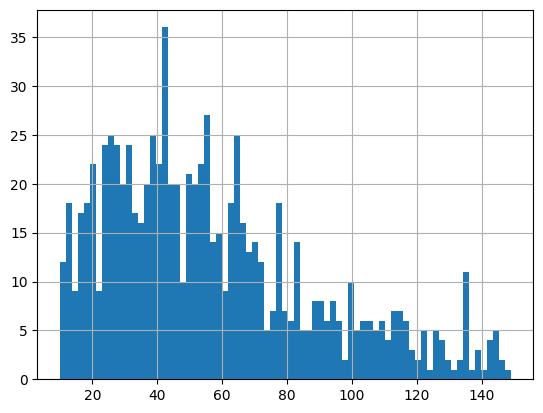

In [20]:
raw_data_filtered.body_word_count.hist(bins=75)

In [22]:
raw_data_filtered.TICKET_TYPE.value_counts()

TICKET_TYPE
how_to              764
feedback             53
bugs                 31
cluster_workflow      2
other                 2
billing               1
Not Chosen            1
Name: count, dtype: int64

In [32]:
how_to_num = 35
feedback_num = 35
bugs_num = 30
seed = 42

how_to_data = raw_data_filtered[raw_data_filtered.TICKET_TYPE == 'how_to'].sample(how_to_num, random_state=seed)
feedback_data = raw_data_filtered[raw_data_filtered.TICKET_TYPE == 'feedback'].sample(feedback_num, random_state=seed)
bugs_data = raw_data_filtered[raw_data_filtered.TICKET_TYPE == 'bugs'].sample(bugs_num, random_state=seed)


final_data = pd.concat([how_to_data, feedback_data, bugs_data])

In [33]:
categories = list(final_data.TICKET_TYPE.unique())
categories

['how_to', 'feedback', 'bugs']

In [34]:
final_testset = []

for idx in range(final_data.shape[0]):
    
    row = final_data.iloc[idx]
    
    text = row['BODY']
    expected_output = row['TICKET_TYPE']

    new_element = {"inp": {"categories_list": categories, "input_text": text},
                   "expected_output": {"possible_categories": expected_output}}
    
    final_testset.append(new_element)

final_testset

[{'inp': {'categories_list': ['how_to', 'feedback', 'bugs'],
   'input_text': 'Hello\n I am having some issues with my board. When i import from Excel into Monday, the date column is not working 100% correctly. \n Also, I have issues with the formulas, I need help with that. \n\nThank you \n\n--\nJohnny Matatov =)'},
  'expected_output': {'possible_categories': 'how_to'}},
 {'inp': {'categories_list': ['how_to', 'feedback', 'bugs'],
   'input_text': "I need help with a formula. I'm trying to subtract a GST column & PST column from a total column and rounding the answer to two decimal places. I'm not sure how to write this:\n\nROUND(MINUS({Total Claim Amount})(SUM({Total Claim Recoverable GST},{Total Claim Recoverable PST}),2)"},
  'expected_output': {'possible_categories': 'how_to'}},
 {'inp': {'categories_list': ['how_to', 'feedback', 'bugs'],
   'input_text': 'Is there a way to show a timeline by hours instead of days? I am tracking when employees are out of the office, which is easy

In [35]:
import json
with open(f'../data/automation_classifier/text_files/formula_research_1.json', 'w', encoding='utf-8') as f:
    json.dump(final_testset, f, ensure_ascii=False, indent=4)

# Parquet


In [36]:
import pandas as pd
import json

In [38]:
raw_data = pd.read_parquet('../data/automation_classifier/text_files/raw_files/tweet_sentiment_extraction.parquet')

In [40]:
raw_data.label_text.value_counts()

label_text
neutral     1430
positive    1103
negative    1001
Name: count, dtype: int64

In [52]:
neutral_num = 35
positive_num = 35
negative_num = 30
seed = 12

neutral_data = raw_data[raw_data.label_text == 'neutral'].sample(neutral_num, random_state=seed)
positive_data = raw_data[raw_data.label_text == 'positive'].sample(positive_num, random_state=seed)
negative_data = raw_data[raw_data.label_text == 'negative'].sample(negative_num, random_state=seed)

final_data = pd.concat([neutral_data, positive_data, negative_data])
final_data = final_data[['text','label_text']]
final_data

,text,label_text
2093,And this picture of her with Zack from Saved B...,neutral
562,Just got in a fight and kicked out of the bar....,neutral
2102,Hows that possible? No rain forecast for Pinkp...,neutral
1100,just had a gym sesh.,neutral
1862,i am the only arabic girl who`s online every ...,neutral
...,...,...
375,So tired.,negative
1117,it makes me sad when people phones are sick,negative
1723,Spilled chocolate milk in my car,negative
1506,Hates having broken wrist and has PE next ugh,negative


In [53]:
categories = list(final_data.label_text.unique())
categories

['neutral', 'positive', 'negative']

In [54]:
final_testset = []

for idx in range(final_data.shape[0]):

    row = final_data.iloc[idx]

    text = row['text']
    expected_output = row['label_text']

    new_element = {"inp": {"categories_list": categories, "input_text": text},
                   "expected_output": {"possible_categories": expected_output}}

    final_testset.append(new_element)

final_testset

[{'inp': {'categories_list': ['neutral', 'positive', 'negative'],
   'input_text': 'And this picture of her with Zack from Saved By The Bell  http://twitpic.com/669lg'},
  'expected_output': {'possible_categories': 'neutral'}},
 {'inp': {'categories_list': ['neutral', 'positive', 'negative'],
   'input_text': 'Just got in a fight and kicked out of the bar. At least I knocked him out. Have a fat lip though.  Pulled another number'},
  'expected_output': {'possible_categories': 'neutral'}},
 {'inp': {'categories_list': ['neutral', 'positive', 'negative'],
   'input_text': 'Hows that possible? No rain forecast for Pinkpop? And I have no ticket'},
  'expected_output': {'possible_categories': 'neutral'}},
 {'inp': {'categories_list': ['neutral', 'positive', 'negative'],
   'input_text': 'just had a gym sesh.'},
  'expected_output': {'possible_categories': 'neutral'}},
 {'inp': {'categories_list': ['neutral', 'positive', 'negative'],
   'input_text': 'i am the only arabic girl who`s online  

In [55]:
final_testset

[{'inp': {'categories_list': ['neutral', 'positive', 'negative'],
   'input_text': 'And this picture of her with Zack from Saved By The Bell  http://twitpic.com/669lg'},
  'expected_output': {'possible_categories': 'neutral'}},
 {'inp': {'categories_list': ['neutral', 'positive', 'negative'],
   'input_text': 'Just got in a fight and kicked out of the bar. At least I knocked him out. Have a fat lip though.  Pulled another number'},
  'expected_output': {'possible_categories': 'neutral'}},
 {'inp': {'categories_list': ['neutral', 'positive', 'negative'],
   'input_text': 'Hows that possible? No rain forecast for Pinkpop? And I have no ticket'},
  'expected_output': {'possible_categories': 'neutral'}},
 {'inp': {'categories_list': ['neutral', 'positive', 'negative'],
   'input_text': 'just had a gym sesh.'},
  'expected_output': {'possible_categories': 'neutral'}},
 {'inp': {'categories_list': ['neutral', 'positive', 'negative'],
   'input_text': 'i am the only arabic girl who`s online  

In [56]:
import json
with open(f'../data/automation_classifier/text_files/tweet_sentiment_extraction.json', 'w', encoding='utf-8') as f:
    json.dump(final_testset, f, ensure_ascii=False, indent=4)